# Assignment DDCM
### Instructor: Prof. Márton Karsai, TA: Adriana Manna


Answer to the list of questions and problems below, by writing your code in the cell below each question. The notebook is to be completed and submitted by 14th March.

In order to solve this assignment, you will need the following python libraries/packages:

 - requests
 - json
 - pandas
 - bs4 
 - geopandas (or another tool to plot on a map)
 - geopy (usually already a geopandas dependency)
 - tweepy (if you make queries with your own Twitter keys)
 - datetime
 - matplotlib

#### Note: All solutions should be commented and explained shortly!

## Exercises 1:

To answer this questions you can use your own Google data: email and locations. If you don't want to share anything about your data, or you don't have a Google account, you are free to use the data provided:

- communication data file: './data/user_communication.json'
- location data file: './data/user_locations.json'

Such data are obtained from CDRs data, with anonymized user and cell tower IDs and shifted coordinates. If you choose to use these data, consider the communication data as the substitute for the email data: they consist of the outgoing and ingoing mobile phone activity of a single user

#### 1.0. Get your own email and location data from Google Takeout (or download the two data files from Moodle)
#### 1.1. Load the email data and print the first item

In [1]:
#I’m using the CDRs data

import json

with open('./data/user_communication.json', 'r') as file: # opening the file
    user_communication = json.load(file) # reading and parsing the file at the same time

user_communication['data'][0] #printing the first item of the "data" element

{'date': '20090328',
 'time': '061546',
 'from': '4',
 'to': '12',
 'cell_tower': '220',
 'event_type': 'MOC'}

#### 1.2. Check if all items have the same features. In case there are items which miss some features, add them and set for them a None value.  Print the value of two features (of your choice) of the last item

In [2]:
#Setting a referential for comparison
first_item_keys = user_communication['data'][0].keys()

def check_same_features(json_file, referential):
    for item in json_file: # Iterating through every item of the file
        if item.keys() != referential: # Are there differences? Yes --> False
            return False
    return True

check_same_features(user_communication['data'][1:], first_item_keys) # executing with the referential and starting from the second element (first one being the referential)

# Printing value of two features from last time
print(user_communication['data'][-1]['date']) #[-1] is to get to the last item, print the value of "date" key
print(user_communication['data'][-1]['event_type'])

20090329
SOM


#### 1.3. Save in a list of tuples the values of dates and times of all the OUTGOING events

In [3]:
outgoing_events = []

# OUTGOING events can be determined by wether the call was "from" the user or from aonther user.
# In this case the user is "4". Hence, I check if the the "from" key has value "4"
for item in user_communication['data']:
    if item['from'] == "4":
        value_date = item['date']
        value_time = item['time']
        outgoing_events.append((value_date, value_time))

outgoing_events


[('20090328', '061546'),
 ('20090328', '053359'),
 ('20090328', '032201'),
 ('20090328', '060436'),
 ('20090328', '061015'),
 ('20090328', '153137'),
 ('20090328', '165705'),
 ('20090328', '160831'),
 ('20090328', '130050'),
 ('20090328', '000411'),
 ('20090328', '125846'),
 ('20090328', '172325'),
 ('20090328', '155638'),
 ('20090328', '153018'),
 ('20090328', '154327'),
 ('20090328', '160706'),
 ('20090328', '061206'),
 ('20090328', '170830'),
 ('20090328', '174409'),
 ('20090328', '174734'),
 ('20090328', '170909'),
 ('20090328', '171945'),
 ('20090328', '180254'),
 ('20090328', '125938'),
 ('20090328', '153154'),
 ('20090328', '163732'),
 ('20090328', '204950'),
 ('20090328', '164509'),
 ('20090328', '160216'),
 ('20090328', '172508'),
 ('20090328', '172526'),
 ('20090328', '172541'),
 ('20090328', '171708'),
 ('20090328', '155302'),
 ('20090328', '163955'),
 ('20090328', '165441'),
 ('20090328', '161625'),
 ('20090328', '162614'),
 ('20090328', '172728'),
 ('20090328', '155936'),


#### 1.4. Convert the tuples of dates and times into timezone-aware (CET) datetime objects. Then, convert them into UNIX time values

In [4]:
import datetime
import pytz
import time

cet_timezone = pytz.timezone('Europe/Paris')

def convert_datetime(tuples_list):
    datetime_objects_cet = []
    for date_str, time_str in tuples_list:
        datetime_string = date_str + time_str # combining the two string elements for a precise datetime object
        datetime_object = datetime.datetime.strptime(datetime_string, '%Y%m%d%H%M%S') # parsing sting into datetime object
        datetime_object_cet = cet_timezone.localize(datetime_object) # making it timezone aware 
        datetime_objects_cet.append(datetime_object_cet) # adding to the main list

    return datetime_objects_cet

datetime_objects_cet_outgoing = convert_datetime(outgoing_events)

# list comprehension using inverse function mktime to create unix timestamps based on datetime object 
unix_timestamp = [time.mktime(x.timetuple()) for x in datetime_objects_cet_outgoing]
unix_timestamp

[1238217346.0,
 1238214839.0,
 1238206921.0,
 1238216676.0,
 1238217015.0,
 1238250697.0,
 1238255825.0,
 1238252911.0,
 1238241650.0,
 1238195051.0,
 1238241526.0,
 1238257405.0,
 1238252198.0,
 1238250618.0,
 1238251407.0,
 1238252826.0,
 1238217126.0,
 1238256510.0,
 1238258649.0,
 1238258854.0,
 1238256549.0,
 1238257185.0,
 1238259774.0,
 1238241578.0,
 1238250714.0,
 1238254652.0,
 1238269790.0,
 1238255109.0,
 1238252536.0,
 1238257508.0,
 1238257526.0,
 1238257541.0,
 1238257028.0,
 1238251982.0,
 1238254795.0,
 1238255681.0,
 1238253385.0,
 1238253974.0,
 1238257648.0,
 1238252376.0,
 1238252673.0,
 1238258025.0,
 1238254076.0,
 1238256083.0,
 1238256795.0,
 1238267789.0,
 1238264368.0,
 1238258979.0,
 1238259589.0,
 1238241369.0,
 1238252991.0,
 1238254322.0,
 1238251313.0,
 1238251237.0,
 1238271941.0,
 1238257987.0,
 1238257230.0,
 1238257245.0,
 1238253731.0,
 1238256674.0,
 1238259975.0,
 1238258498.0,
 1238265088.0,
 1238264051.0,
 1238273868.0,
 1238264669.0,
 123827010

#### 1.5. Plot the inter-event time distribution on a log-log plot

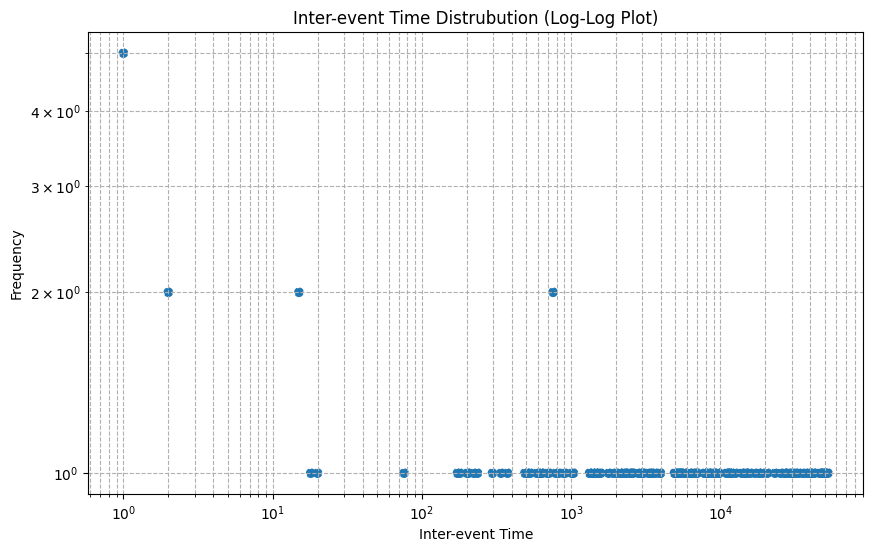

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
############ TO DO ###############

def plot_inter_time_distribution(timestamps, plot_title):
    #unix_timestamp.sort() # sorting unix values so the time_difference can be correctly computed
    inter_events_outgoing = []
    for i in range(1, len(timestamps)): # assinging indices to the unix_timestamps list starting from second element because comparing with the first one [0].
        time_difference = abs(timestamps[i] - timestamps[i-1]) # computing inter-event time in absolute values due to negative elements
        inter_events_outgoing.append(time_difference)

    # computing the frequencies of inter-event times

    frequencies = Counter(inter_events_outgoing)


    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(list(frequencies.keys()), list(frequencies.values()), marker='o', linestyle='--')
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f'{plot_title}')
    plt.xlabel('Inter-event Time')
    plt.ylabel('Frequency')
    plt.grid(True, which="both", ls="--")
    plt.show()

plot_inter_time_distribution(unix_timestamp, "Inter-event Time Distrubution (Log-Log Plot)")

#### 1.6. Compute and plot the circadian pattern, i.e. the total number of events observed each hour (aggregate over the days of observation)

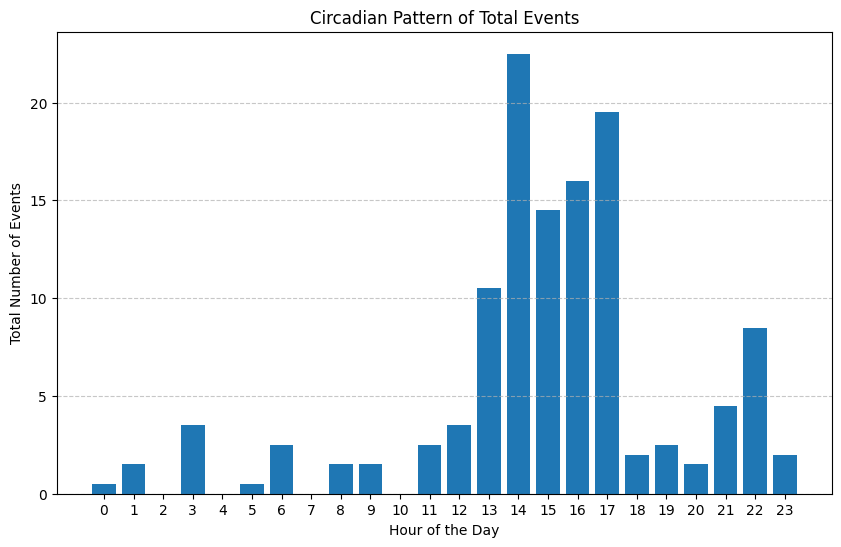

In [6]:
# over the days, have the average number of events observed each hour

# getting the total number of events 
total_events = []

for item in user_communication['data']:
    value_date = item['date']
    value_time = item['time']
    total_events.append((value_date, value_time))

# converting it to datetime objects
total_events_datetime_cet = convert_datetime(total_events)

def circadian_pattern_aggregate(events_datetime, plot_title):
    ### Average number of events per hour for every day of observation
    # Calculating total number of days
    unique_dates = {data.date() for data in events_datetime} # extracting unique dates
    total_days = len(unique_dates)


    # Total number of events observed each hour 
    hours = [data.hour for data in total_events_datetime_cet] # extracting the hours from the datetime.datetime object
    hour_frequency = Counter(hours)
    average_hour_frequency = {hour: count / total_days for hour, count in hour_frequency.items()} # dict comprehension where key is `hour` and value is `count / total_days` which is the average number of events of the `hour` over every day.

    # Plotting 
    plt.figure(figsize=(10, 6))
    plt.bar(average_hour_frequency.keys(), average_hour_frequency.values())
    plt.title(f'{plot_title}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Number of Events')
    plt.xticks(range(24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

circadian_pattern_aggregate(total_events_datetime_cet, "Circadian Pattern of Total Events")

#### 1.7. Plot the inter-event time distribution and the circadian pattern for INCOMING events

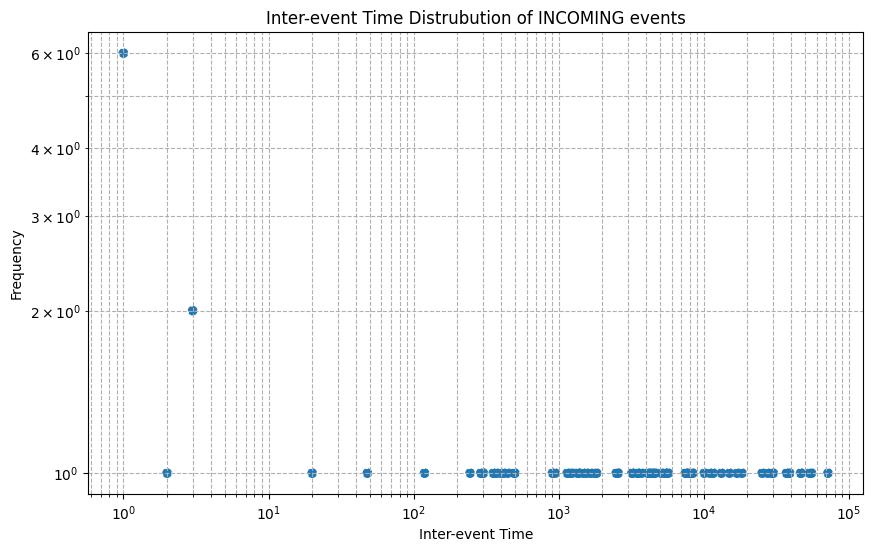

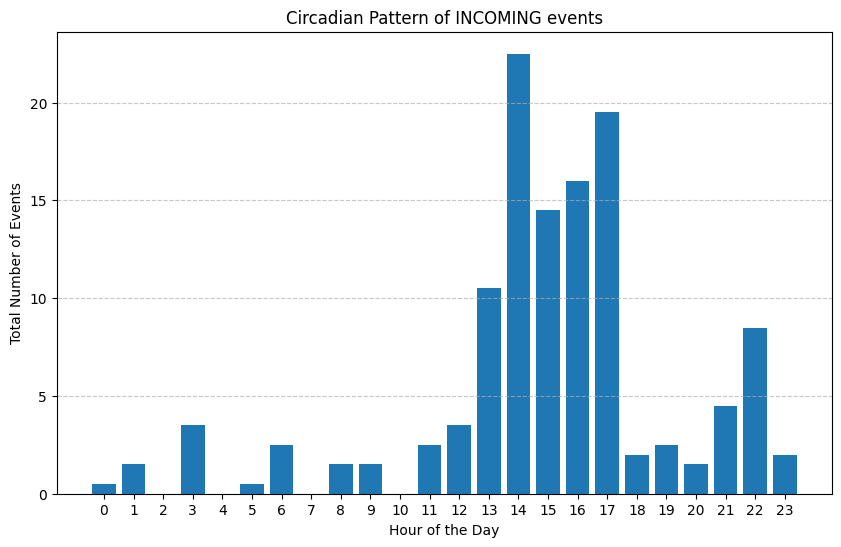

In [7]:
# INCOMING events considered as anything `to` user 4
incoming_events = []
for item in user_communication['data']:
    if item['to'] == "4":
        value_date = item['date']
        value_time = item['time']
        incoming_events.append((value_date, value_time))

datetime_incoming_events = convert_datetime(incoming_events)
unix_incoming_events = [time.mktime(x.timetuple()) for x in datetime_incoming_events]

# plotting
plot_inter_time_distribution(unix_incoming_events, "Inter-event Time Distrubution of INCOMING events")
circadian_pattern_aggregate(datetime_incoming_events, "Circadian Pattern of INCOMING events")

#### 1.8. Load the location data and print the first item

In [8]:
with open('./data/user_locations.json', 'r') as file:
    user_location = json.load(file)

user_location['data'][0]

    

{'location_id': '17963',
 'coords': {'lng': '14.2088', 'lat': '41.7211'},
 'date': '20090328',
 'time': '004623'}

#### 1.9. Convert the json in a pandas dataframe with 5 columns: 'location_id', 'coords-lng', 'coords-lat', 'date', 'time'

In [9]:
import pandas as pd

df = pd.json_normalize(user_location['data'])
df


location_id      date    time coords.lng coords.lat
0         17963  20090328  004623    14.2088    41.7211
1         17320  20090328  011949    14.1975    41.7266
2         18963  20090328  024043    14.2358     41.765
3         19043  20090328  025640    14.2391     41.798
4        -52805  20090328  025658    14.2391     41.798
..          ...       ...     ...        ...        ...
496       17514  20090329  223532    14.2004    41.7313
497      -51587  20090329  202706    14.2005    41.7396
498       18330  20090329  204842    14.2179    41.7421
499       18029  20090329  211923    14.2104    41.7347
500       18029  20090329  211627    14.2104    41.7347

[501 rows x 5 columns]

#### 1.10 geolocalised data pre-processing

1.10.1 Substitute the two columns 'date' and 'time' with a single column called 'unix_time' by converting times in unix values (following the same steps in point 4.).

1.10.2 Put together the longitude and latitude entries and turn them into geospatial objects, and then the dataframe into a geodataframe (the two columns 'coords-lng' and 'coords-lat' should be substituted by a single column named 'geometry').

1.10.3 Set the coordinate reference system as epsg=4326. The resulting geodaframe should have only three columns left: 'location_id', 'unix_time', and 'geometry'

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import time

datetime_tuple = list(zip(df.date, df.time)) # creating tuple to give to function

datetime_object_geo = convert_datetime(datetime_tuple) # using function to convert easily 
df['unix_time'] = [time.mktime(x.timetuple()) for x in datetime_object_geo] # same list comprehension as above for unix timestamps
df = df.drop(columns=['date', 'time']) # dropping columns 

In [11]:
geometry = [Point(xy) for xy in zip (df['coords.lng'], df['coords.lat'])] # tuple list based on values of coords.lng and coords.lat with list coprehensioon
df['geometry'] = geometry # adding column
df = df.drop(columns=['coords.lng', 'coords.lat']) # dropping columns

In [12]:
# convert to geodataframe
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# setting CRS as EPSG 4326
gdf.crs = 'epsg:4326'

gdf

location_id     unix_time                   geometry
0         17963  1.238198e+09  POINT (14.20880 41.72110)
1         17320  1.238200e+09  POINT (14.19750 41.72660)
2         18963  1.238204e+09  POINT (14.23580 41.76500)
3         19043  1.238205e+09  POINT (14.23910 41.79800)
4        -52805  1.238205e+09  POINT (14.23910 41.79800)
..          ...           ...                        ...
496       17514  1.238359e+09  POINT (14.20040 41.73130)
497      -51587  1.238351e+09  POINT (14.20050 41.73960)
498       18330  1.238353e+09  POINT (14.21790 41.74210)
499       18029  1.238354e+09  POINT (14.21040 41.73470)
500       18029  1.238354e+09  POINT (14.21040 41.73470)

[501 rows x 3 columns]

#### 1.11. Get from the datasets of geopandas the map of the country / continent where you think your activity is concentrated (if you're using the data provided, use get the map of Italy), and plot the activity on the map

/tmp/ipykernel_36140/2475775965.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

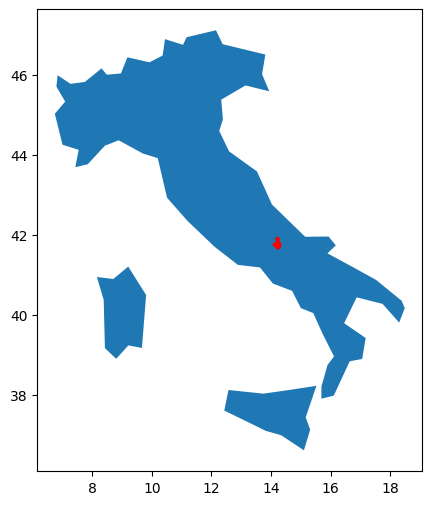

In [13]:
earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
italy = earth[earth.name == "Italy"]

# plotting the map 
ax = italy.plot(figsize=(10, 6))

# plotting the activity on the map 
gdf.plot(ax=ax, color='red', markersize=2)


#### 1.12. Considering only the activity during the night (from 22 to 6), infer the home location_id as the most frequent location during this period

In [14]:
# first convert unix timestmaps to datetime object for easier subgrouping as I don’t know if the dataframe spans accross multiple days or not
gdf_copy = gdf.copy()
gdf_copy['datetime'] = gdf_copy['unix_time'].apply(lambda ts: datetime.datetime.fromtimestamp(ts)) # converting unix time to datetime
gdf_subset_night = gdf_copy[(gdf_copy['datetime'].dt.hour >= 22) | (gdf_copy['datetime'].dt.hour <= 6)] # conditions for timeframe between 22 and 6
gdf_subset_night

# counting the frequency of location_ids 
night_location_id_counts = gdf_subset_night['location_id'].value_counts() # count frequency of each row 
home_location_id = night_location_id_counts.idxmax() # finding the most frequent location_id
home_location_id

'-50303'

#### 1.13. Convert the geodataframe into the CRS epsg=32633 and compute the spatial uncertainty

In [15]:
gdf_new_CRS = gdf.to_crs(epsg=32633) # setting new CRS
spatial_uncertainty = gdf_new_CRS['geometry'].area # computing the spatial uncertainty (not sure what it is)
spatial_uncertainty

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
Length: 501, dtype: float64

## Exercise 2:

The aim of the exercise is:

 - get the tables of the biggest stadiums in the world (in terms of capacity) by scraping the wikipedia page https://en.wikipedia.org/wiki/List_of_stadiums_by_capacity and obtain a pandas dataframe
 - get the coordinates of the cities where these stadiums are located through a simple API
 - get a map of the world
 - after coupling the stadium dataframe with the locations of the respective cities, plot the stadium locations on the world map and color them (or size them) according to their capacity
 
Below is a list of step-by-step instructions on how to solve this exercise. Since it's not the only way to do it, you can also choose not to follow these instructions and to develop your own method

#### 2.1. Make a HTTP request to this Wikipedia page: https://en.wikipedia.org/wiki/List_of_stadiums_by_capacity. Print the text of the response

In [16]:
import requests
response = requests.get("https://en.wikipedia.org/wiki/List_of_stadiums_by_capacity")
response.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of stadiums by capacity - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-p

#### 2.2. With BeautifulSoup, parse the response and print the title of the webpage

In [17]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
soup.title

<title>List of stadiums by capacity - Wikipedia</title>

#### 2.3 Find all the 'table's object and save those in a new variable. How many tables do you find?

Nb: you need to specify the {'class': 'wikitable'}

In [18]:
wiki_tables = soup.find_all('table', {'class': 'wikitable'}) # find all tables element with the class "wikitable"

#### 2.4. First, let's focus on the first table. In this table, find all the 'th' objects and save the respective texts in a list called column_list. These will be the column names in the final dataframe

In [19]:
first_table = wiki_tables[0] # accessing first table
headers = first_table.find_all('th') # find all headers of first table
column_list = [e.get_text(strip=True) for e in headers] # list comprehension to get text in each header of first table and strip html elements
column_list


['Stadium',
 'Capacity',
 'City (state)',
 'Country',
 'Region',
 'Tenants',
 'Sport(s)',
 'Image']

#### 2.5. Let's now work on the rows of the table. First, find all the 'tr' objects in the table, store them in a list called row_list. Print the second element of row_list

In [20]:
row_list = first_table.find_all('tr') # get all tables row in first table
len(row_list)


12

#### 2.6 Consider the second element of row_list. We need to turn it into a readable list (which will later be a single row in a table). To do this, find all the 'td' objects in this element, save the respective texts in a list and print the list

In [21]:
second_row = row_list[1] # accessing second element of row_list
td_elements = second_row.find_all('td') # finding all data element of the second row
td_text_list = [e.get_text(strip=True) for e in td_elements] # getting text of data element and strip html elements
td_text_list

['Narendra Modi Stadium[1]',
 '132,000[2][3]',
 'Ahmedabad,Gujarat',
 'India',
 'South Asia',
 "India national cricket team,India women's national cricket team,Gujarat Titans,Gujarat cricket team",
 'Cricket',
 '']

#### 2.7 Now do the same operation for all the elements in row_list. Save all these lists in a single list (a list of lists) called data

In [22]:
data = [] # empty list to store data
for row in first_table.find_all('tr'): # iterate through all table row of first table
    td_elements = row.find_all('td') # get all data element of the row 
    td_text_list = [e.get_text(strip=True) for e in td_elements] # strip text from html and put into list
    data.append(td_text_list) # put stripped text to the data list

data

[[],
 ['Narendra Modi Stadium[1]',
  '132,000[2][3]',
  'Ahmedabad,Gujarat',
  'India',
  'South Asia',
  "India national cricket team,India women's national cricket team,Gujarat Titans,Gujarat cricket team",
  'Cricket',
  ''],
 ['Rungrado 1st of May Stadium',
  '114,000[4]',
  'Pyongyang',
  'North Korea',
  'East Asia',
  'Korea DPR national football team*',
  'Football,athletics,mass games',
  ''],
 ['Michigan Stadium',
  '107,601[5]',
  'Ann Arbor, Michigan',
  'United States',
  'North America',
  'Michigan Wolverines football',
  'American football',
  ''],
 ['Beaver Stadium',
  '106,572[6]',
  'State College, Pennsylvania',
  'United States',
  'North America',
  'Penn State Nittany Lions football',
  'American football',
  ''],
 ['Ohio Stadium',
  '102,780[7]',
  'Columbus, Ohio',
  'United States',
  'North America',
  'Ohio State Buckeyes football',
  'American football',
  ''],
 ['Kyle Field',
  '102,733[8]',
  'College Station, Texas',
  'United States',
  'North America',

#### 2.8. Keep only the lists that have the same length of column_list. Turn data into a pandas dataframe, and use column_list as column names

In [23]:
same_length_list = [row for row in data if len(row) == len(column_list)] # list comprehension with evaluation for same length 
first_df = pd.DataFrame(same_length_list, columns=column_list) # create data frame

first_df

Stadium       Capacity  \
0                 Narendra Modi Stadium[1]  132,000[2][3]   
1              Rungrado 1st of May Stadium     114,000[4]   
2                         Michigan Stadium     107,601[5]   
3                           Beaver Stadium     106,572[6]   
4                             Ohio Stadium     102,780[7]   
5                               Kyle Field     102,733[8]   
6                            Tiger Stadium     102,321[9]   
7                          Neyland Stadium    101,915[10]   
8   Darrell K Royal–Texas Memorial Stadium    100,119[11]   
9                     Bryant–Denny Stadium    100,077[12]   
10                Melbourne Cricket Ground    100,024[13]   

                   City (state)        Country         Region  \
0             Ahmedabad,Gujarat          India     South Asia   
1                     Pyongyang    North Korea      East Asia   
2           Ann Arbor, Michigan  United States  North America   
3   State College, Pennsylvania  United States  North America   
4                Columbus, Ohio  United States  North America   
5        College Station, Texas  United States  North America   
6        Baton Rouge, Louisiana  United States  North America   
7          Knoxville, Tennessee  United States  North America   
8                 Austin, Texas  United States  North America   
9           Tuscaloosa, Alabama  United States  North America   
10           Melbourne,Victoria      Australia        Oceania   

                                              Tenants  \
0   India national cricket team,India women's nati...   
1                   Korea DPR national football team*   
2                        Michigan Wolverines football   
3                   Penn State Nittany Lions football   
4                        Ohio State Buckeyes football   
5                           Texas A&M Aggies football   
6                                 LSU Tigers football   
7                       Tennessee Volunteers football   
8                            Texas Longhorns football   
9                       Alabama Crimson Tide football   
10  Australia national cricket team,Victoria crick...   

                             Sport(s) Image  
0                             Cricket        
1       Football,athletics,mass games        
2                   American football        
3                   American football        
4                   American football        
5                   American football        
6                   American football        
7                   American football        
8                   American football        
9                   American football        
10  Cricket,Australian rules football

#### 2.9.Now let's repeat the operations on each table in order to convert each of those in a dataframe. Merge all the dataframes in an unique one. 


##### Nb. You need to handle the possibility that the dataframes have different columns

In [24]:
def make_df(table): # creatingn function to make dataframe using all the steps done above
    headers = table.find_all('th')
    column_list = [e.get_text(strip=True) for e in headers]
    row_list = table.find_all('tr')

    data = []
    for row in table.find_all('tr'):
        td_elements = row.find_all('td')
        td_text_list = [e.get_text(strip=True) for e in td_elements]
        data.append(td_text_list)
    
    same_length_list = [row for row in data if len(row) == len(column_list)]
    df = pd.DataFrame(same_length_list, columns=column_list)
    return df

dfs = []
for table in wiki_tables: # iterate through each table of wiki tables and call make_df function 
    df_result = make_df(table)
    dfs.append(df_result) # append results to the dfs list

merged_df = pd.concat(dfs) # merging dataframes with concat 

merged_df.info()
    

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 0 to 224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Stadium       532 non-null    object
 1   Capacity      532 non-null    object
 2   City (state)  532 non-null    object
 3   Country       532 non-null    object
 4   Region        532 non-null    object
 5   Tenants       532 non-null    object
 6   Sport(s)      532 non-null    object
 7   Image         43 non-null     object
dtypes: object(8)
memory usage: 37.4+ KB


#### 2.10. Turn the entries (which are currently strings) in the 'Capacity' column into numeric.

You should go trought the following steps 
 - 1. Cut the string entries up the sevents characters (stadium capacities are up to 6 digits, plus the comma)
 - 2.  Eliminate all non-numeric characters, either with a regular expression or by replacing commas and other non-numeric characters with nothing
 - 3.  Finally, turn the column to numeric

In [28]:
merged_df['Capacity'] = merged_df['Capacity'].astype(str)  # Convert to string… Not sure why it’s not already a string
merged_df['Capacity'] = merged_df['Capacity'].str[:7] # cutting till the sevenths characetr
merged_df['Capacity'] = merged_df['Capacity'].str.replace(r'\D', '', regex=True) # elimnating all non-numeric character with regex 
merged_df['Capacity'] = pd.to_numeric(merged_df['Capacity']) # turn column to numeric 
merged_df.dtypes

Stadium         object
Capacity         int64
City (state)    object
Country         object
Region          object
Tenants         object
Sport(s)        object
Image           object
dtype: object

#### 2.11. The snapshot of code below shows how to get the geospatial coordinates of a given series of places with the Nominatim's simple API.
- By adapting the snapshot to your case, get the geospatial coordinates of all the places in the column 'City / state' (it will take a while due to the rate limiter). Print the result. 
- Get the list of tuples of longitude and latitude (you can exploit the respective methods) and turn them into shapely Point objects. Then, add the resulting list to the dataframe as a column called 'geometry'. Lastly turn the dataframe into a geopandas geodataframe

In [ ]:
# code to get geolocations

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import certifi
import ssl

# Create a Nominatim geolocator
geolocator = Nominatim(user_agent='assignment_geocoder', ssl_context=ssl.create_default_context(cafile=certifi.where()))
  
locations = merged_df['City (state)'].apply(lambda x: geolocator.geocode(x,timeout=2)) # get geospatial data for all city in the df column
locations

In [38]:
merged_df['geometry'] = locations.apply(lambda p: Point(p.longitude, p.latitude)) # making shapely point objects for all rows in geometry df’s column
merged_gdf = gpd.GeoDataFrame(merged_df) # making it a geodataframe
merged_gdf

Stadium  Capacity  \
0                       Narendra Modi Stadium[1]    132000   
1                    Rungrado 1st of May Stadium    114000   
2                               Michigan Stadium    107601   
3                                 Beaver Stadium    106572   
4                                   Ohio Stadium    102780   
..                                           ...       ...   
220                                 Hauptstadion     40000   
221                               Xining Stadium     40000   
222    Shaoxing China Textile City Sports Center     40000   
223                 Anqing Sports Centre Stadium     40000   
224  Monumental Stadium of Caracas Simón Bolívar     40000   

                    City (state)        Country         Region  \
0              Ahmedabad,Gujarat          India     South Asia   
1                      Pyongyang    North Korea      East Asia   
2            Ann Arbor, Michigan  United States  North America   
3    State College, Pennsylvania  United States  North America   
4                 Columbus, Ohio  United States  North America   
..                           ...            ...            ...   
220                       Aachen        Germany         Europe   
221                       Xining          China      East Asia   
222                     Shaoxing          China      East Asia   
223                       Anqing          China      East Asia   
224                      Caracas      Venezuela  South America   

                                               Tenants  \
0    India national cricket team,India women's nati...   
1                    Korea DPR national football team*   
2                         Michigan Wolverines football   
3                    Penn State Nittany Lions football   
4                         Ohio State Buckeyes football   
..                                                 ...   
220                Aachen-Laurensberger Rennverein[de]   
221                               local football teams   
222                                                      
223                                                      
224                                 Leones del Caracas   

                          Sport(s) Image                    geometry  
0                          Cricket         POINT (72.57971 23.02162)  
1    Football,athletics,mass games        POINT (125.74736 39.01680)  
2                American football        POINT (-83.74846 42.28137)  
3                American football        POINT (-77.86164 40.79445)  
4                American football        POINT (-83.00071 39.96226)  
..                             ...   ...                         ...  
220      equestrianandshow jumping   NaN    POINT (6.08386 50.77635)  
221           Association football   NaN  POINT (101.77620 36.61733)  
222                      Athletics   NaN  POINT (120.57685 29.99924)  
223                      Athletics   NaN  POINT (116.63026 30.65923)  
224                       Baseball   NaN  POINT (-66.91460 10.50609)  

[532 rows x 9 columns]

#### 2.12. Get a geodataframe of the world map (you can easily get it from the geopandas datasets) and plot the stadiums on the world map, and color them according to their capacity

/tmp/ipykernel_36140/3408027613.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


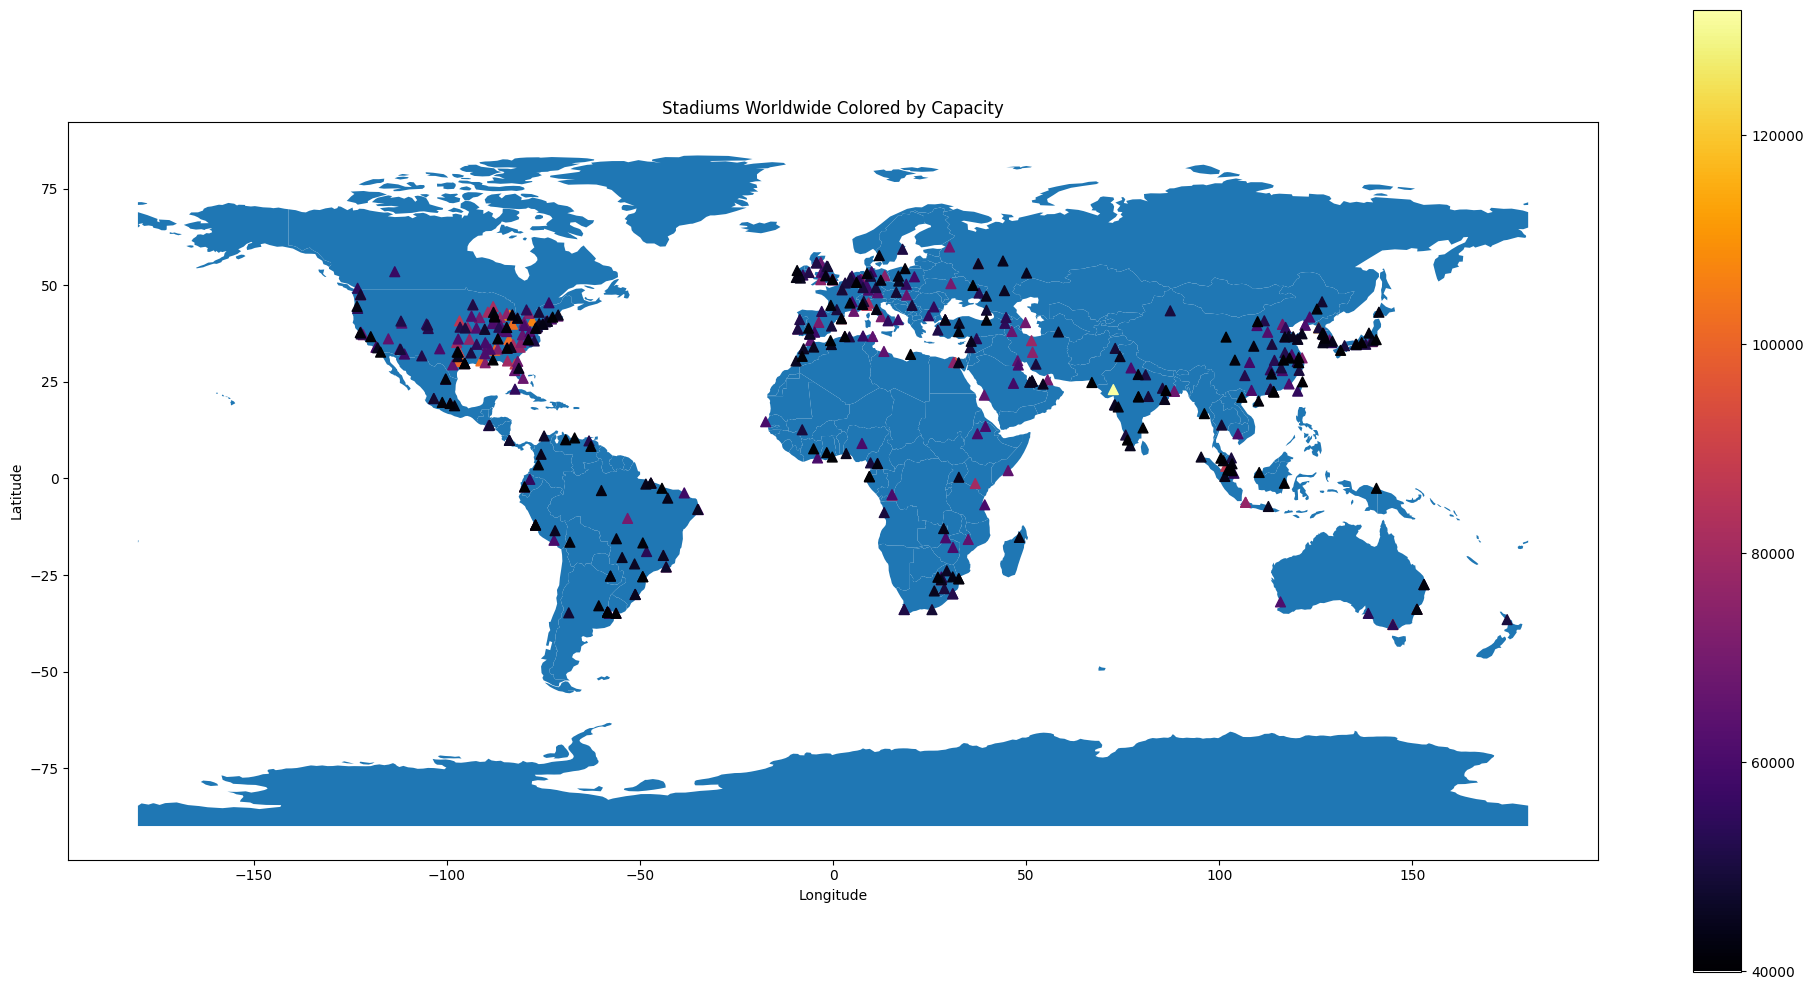

In [69]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # getting world map
world.plot(figsize=(20, 10))

# plotting dataframe
merged_gdf.plot(ax=plt.gca(), markersize=50, marker='^', column='Capacity', legend=True, cmap='inferno') # customs + deterimning the column as data
# Customize toolbar for legend
norm = plt.Normalize(vmin=merged_gdf['Capacity'].min(), vmax=merged_gdf['Capacity'].max()) # creating norm for scaled colors 
sm = ScalarMappable(cmap='inferno', norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Capacity')

# Plotting
plt.title('Stadiums Worldwide Colored by Capacity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

plt.show()

In [ ]:
# end :)